# Imports

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras.utils as image
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten, BatchNormalization, Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import numpy as np

# Data Preperation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images
! kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
! kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset
! kaggle datasets download -d tolgadincer/labeled-chest-xray-images
! kaggle datasets download -d ankit8467/fetal-head-ultrasound-dataset-for-image-segment
! kaggle datasets download -d tommyngx/figure-detection


! mkdir xray-images
! unzip chest-xray-masks-and-labels.zip -d xray-images

! mkdir xray-images2
! unzip labeled-chest-xray-images.zip -d xray-images2

! mkdir xray-images-hand
! unzip figure-detection.zip -d xray-images-hand

! mkdir mri-images
! unzip brain-tumor-mri-dataset.zip -d mri-images

! mkdir ctscan
! unzip chest-ctscan-images.zip -d ctscan

! mkdir ctscank
! unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d ctscank

! mkdir ultrasound
! unzip breast-ultrasound-images-dataset.zip -d ultrasound

! mkdir ultrasound2
! unzip fetal-head-ultrasound-dataset-for-image-segment.zip -d ultrasound2



Streaming output truncated to the last 5000 lines.
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2078).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2079).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (208).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2080).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2081).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2082).jpg  
  inflating: ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (2083).jpg  
  inflating: ctscank/CT-KIDNEY-DA

In [ ]:
! mkdir datasets

#train folders
! mkdir datasets/train
! mkdir datasets/train/mri-brain
! mkdir datasets/train/xray-chest
! mkdir datasets/train/xray-hand
! mkdir datasets/train/ultrasound-fetal-head
! mkdir datasets/train/ultrasound-breast
! mkdir datasets/train/ctscan-kidney
! mkdir datasets/train/ctscan-chest

#test folders
! mkdir datasets/test
! mkdir datasets/test/mri-brain
! mkdir datasets/test/xray-chest
! mkdir datasets/test/xray-hand
! mkdir datasets/test/ultrasound-fetal-head
! mkdir datasets/test/ultrasound-breast
! mkdir datasets/test/ctscan-kidney
! mkdir datasets/test/ctscan-chest

#validation folders
! mkdir datasets/valid
! mkdir datasets/valid/mri-brain
! mkdir datasets/valid/xray-chest
! mkdir datasets/valid/xray-hand
! mkdir datasets/valid/ultrasound-fetal-head
! mkdir datasets/valid/ultrasound-breast
! mkdir datasets/valid/ctscan-kidney
! mkdir datasets/valid/ctscan-chest

## Ultrasound data

### Remove mask images

In [ ]:
my_dir = "/content/ultrasound/Dataset_BUSI_with_GT/benign"
for fname in os.listdir(my_dir):
    if "mask" in fname:
        os.remove(os.path.join(my_dir, fname))
my_dir = "/content/ultrasound/Dataset_BUSI_with_GT/malignant"
for fname in os.listdir(my_dir):
    if "mask" in fname:
        os.remove(os.path.join(my_dir, fname))
my_dir = "/content/ultrasound/Dataset_BUSI_with_GT/normal"
for fname in os.listdir(my_dir):
    if "mask" in fname:
        os.remove(os.path.join(my_dir, fname))

my_dir = "/content/ultrasound2/training_set/training_set"
for fname in os.listdir(my_dir):
    if "Annotation" in fname:
        os.remove(os.path.join(my_dir, fname))



### trensfer ultrasound images to datasets folder

In [ ]:
os.chdir("/content/ultrasound/Dataset_BUSI_with_GT/benign")
for c in random.sample(glob.glob("*"),50):
    shutil.move(c,'../../../datasets/test/ultrasound-breast')
for c in random.sample(glob.glob("*"),50):
    shutil.move(c,'../../../datasets/valid/ultrasound-breast')
for c in random.sample(glob.glob("*"),337):
    shutil.move(c,'../../../datasets/train/ultrasound-breast')
os.chdir('../../../')
os.chdir("/content/ultrasound/Dataset_BUSI_with_GT/malignant")
for c in random.sample(glob.glob("*"),55):
    shutil.move(c,'../../../datasets/test/ultrasound-breast')
for c in random.sample(glob.glob("*"),55):
    shutil.move(c,'../../../datasets/valid/ultrasound-breast')
for c in random.sample(glob.glob("*"),100):
    shutil.move(c,'../../../datasets/train/ultrasound-breast')
os.chdir('../../../')
os.chdir("/content/ultrasound/Dataset_BUSI_with_GT/normal")
for c in random.sample(glob.glob("*"),30):
    shutil.move(c,'../../../datasets/test/ultrasound-breast')
for c in random.sample(glob.glob("*"),30):
    shutil.move(c,'../../../datasets/valid/ultrasound-breast')
for c in random.sample(glob.glob("*"),73):
    shutil.move(c,'../../../datasets/train/ultrasound-breast')
os.chdir('../../../')

os.chdir("/content/ultrasound2/training_set/training_set")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/ultrasound-fetal-head')
os.chdir('../../../')

os.chdir("/content/ultrasound2/test_set/test_set")
for c in random.sample(glob.glob("*"),168):
    shutil.move(c,'../../../datasets/test/ultrasound-fetal-head')
for c in random.sample(glob.glob("*"),168):
  shutil.move(c,'../../../datasets/valid/ultrasound-fetal-head')
os.chdir('../../../')


total:2116


1.   training: 1510
2.   testing: 303
3.   validation: 303



## Mri data

In [ ]:

os.chdir("/content/mri-images/Training/glioma")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Training/meningioma")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Training/notumor")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Training/pituitary")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/mri-brain')
os.chdir('../../../')



os.chdir("/content/mri-images/Testing/glioma")
for c in random.sample(glob.glob("*"),150):
    shutil.move(c,'../../../datasets/test/mri-brain')
for c in random.sample(glob.glob("*"),150):
    shutil.move(c,'../../../datasets/valid/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Testing/meningioma")
for c in random.sample(glob.glob("*"),153):
    shutil.move(c,'../../../datasets/test/mri-brain')
for c in random.sample(glob.glob("*"),153):
    shutil.move(c,'../../../datasets/valid/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Testing/notumor")
for c in random.sample(glob.glob("*"),203):
    shutil.move(c,'../../../datasets/test/mri-brain')
for c in random.sample(glob.glob("*"),202):
    shutil.move(c,'../../../datasets/valid/mri-brain')
os.chdir('../../../')
os.chdir("/content/mri-images/Testing/pituitary")
for c in random.sample(glob.glob("*"),150):
    shutil.move(c,'../../../datasets/test/mri-brain')
for c in random.sample(glob.glob("*"),150):
    shutil.move(c,'../../../datasets/valid/mri-brain')
os.chdir('../../../')

total: 7023


1.   training: 5712
2.   testing: 656
3.   validation: 655



total: 6000


1.   Training: 4500
2.   Testing:  750
3.   Validation: 750



## Xray data

In [ ]:
os.chdir("/content/xray-images/Lung Segmentation/CXR_png")
for c in glob.glob("*"):
    shutil.move(c,'../../../datasets/train/xray-chest')
os.chdir('../../../')
os.chdir("/content/xray-images/Lung Segmentation/test")
for c in random.sample(glob.glob("*"),48):
    shutil.move(c,'../../../datasets/test/xray-chest')
for c in random.sample(glob.glob("*"),48):
    shutil.move(c,'../../../datasets/valid/xray-chest')
os.chdir('../../../')

total: 869


1.   training: 800
2.   testing: 48
3.   validation: 48

In [ ]:
os.chdir("/content/xray-images2/chest_xray/train/NORMAL")
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/xray-chest')
os.chdir('../../../../')
os.chdir("/content/xray-images2/chest_xray/train/PNEUMONIA")
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/xray-chest')
os.chdir('../../../../')
os.chdir("/content/xray-images2/chest_xray/test/NORMAL")
for c in random.sample(glob.glob("*"),117):
    shutil.move(c,'../../../../datasets/test/xray-chest')
for c in random.sample(glob.glob("*"),117):
    shutil.move(c,'../../../../datasets/valid/xray-chest')
os.chdir('../../../../')
os.chdir("/content/xray-images2/chest_xray/test/PNEUMONIA")
for c in random.sample(glob.glob("*"),195):
    shutil.move(c,'../../../../datasets/test/xray-chest')
for c in random.sample(glob.glob("*"),195):
    shutil.move(c,'../../../../datasets/valid/xray-chest')
os.chdir('../../../../')

total: 5826


1.   training: 5232
2.   testing: 312
3.   validation: 312

In [ ]:
os.chdir("/content/xray-images-hand/train")
for c in glob.glob("*"):
    shutil.move(c,'../../datasets/train/xray-hand')

os.chdir("/content/xray-images-hand/val")
for c in random.sample(glob.glob("*"),231):
    shutil.move(c,'../../datasets/test/xray-hand')
for c in random.sample(glob.glob("*"),230):
    shutil.move(c,'../../datasets/valid/xray-hand')

os.chdir('../../')

total: 5567


1.   training: 5106
2.   testing: 312
3.   validation: 312

Total des base xray: 12262

## CT Scan Data

### fixing naming

In [ ]:
def custom_rename(path, name_to_add):
  i=0
  for filename in os.listdir(path):
    source = path + "/" + filename
    dest = path + "/" + name_to_add + '-' + filename
    os.rename(source, dest)
    i +=1




In [ ]:
path="/content/ctscan/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
custom_rename(path, "ad")
path="/content/ctscan/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"
custom_rename(path, "lc")
path="/content/ctscan/Data/train/normal"
custom_rename(path, "nr")
path="/content/ctscan/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"
custom_rename(path, "sc")

path="/content/ctscan/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
custom_rename(path, "ad")
path="/content/ctscan/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"
custom_rename(path, "lc")
path="/content/ctscan/Data/valid/normal"
custom_rename(path, "nr")
path="/content/ctscan/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"
custom_rename(path, "sc")

path="/content/ctscan/Data/test/adenocarcinoma"
custom_rename(path, "ad")
path="/content/ctscan/Data/test/large.cell.carcinoma"
custom_rename(path, "lc")
path="/content/ctscan/Data/test/normal"
custom_rename(path, "nr")
path="/content/ctscan/Data/test/squamous.cell.carcinoma"
custom_rename(path, "sc")



In [ ]:
path="/content/ctscan/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib"
os.chdir(path)
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa"
os.chdir(path)
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/train/normal"
os.chdir(path)
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"
os.chdir(path)
for c in glob.glob("*"):
    shutil.move(c,'../../../../datasets/train/ctscan-chest')
os.chdir('../../../../')

path="/content/ctscan/Data/test/adenocarcinoma"
os.chdir(path)
for c in random.sample(glob.glob("*"),60):
    shutil.move(c,'../../../../datasets/test/ctscan-chest')
for c in random.sample(glob.glob("*"),60):
    shutil.move(c,'../../../../datasets/valid/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/test/large.cell.carcinoma"
os.chdir(path)
for c in random.sample(glob.glob("*"),26):
    shutil.move(c,'../../../../datasets/test/ctscan-chest')
for c in random.sample(glob.glob("*"),25):
    shutil.move(c,'../../../../datasets/valid/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/test/normal"
os.chdir(path)
for c in random.sample(glob.glob("*"),27):
    shutil.move(c,'../../../../datasets/test/ctscan-chest')
for c in random.sample(glob.glob("*"),27):
    shutil.move(c,'../../../../datasets/valid/ctscan-chest')
os.chdir('../../../../')
path="/content/ctscan/Data/test/squamous.cell.carcinoma"
os.chdir(path)
for c in random.sample(glob.glob("*"),45):
    shutil.move(c,'../../../../datasets/test/ctscan-chest')
for c in random.sample(glob.glob("*"),45):
    shutil.move(c,'../../../../datasets/valid/ctscan-chest')
os.chdir('../../../../')




total: 928


1.   training: 613
2.   testing: 158
3.   validation: 157

In [ ]:
# CT SCAN KIDNEY
os.chdir("/content/ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst")
for c in random.sample(glob.glob("*"),800):
    shutil.move(c,'../../../../datasets/test/ctscan-kidney')
for c in random.sample(glob.glob("*"),200):
    shutil.move(c,'../../../../datasets/valid/ctscan-kidney')
for c in random.sample(glob.glob("*"),2709):
    shutil.move(c,'../../../../datasets/train/ctscan-kidney')
os.chdir('../../../../')
os.chdir("/content/ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal")
for c in random.sample(glob.glob("*"),1000):
    shutil.move(c,'../../../../datasets/test/ctscan-kidney')
for c in random.sample(glob.glob("*"),500):
    shutil.move(c,'../../../../datasets/valid/ctscan-kidney')
for c in random.sample(glob.glob("*"),3577):
    shutil.move(c,'../../../../datasets/train/ctscan-kidney')
os.chdir('../../../../')
os.chdir("/content/ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone")
for c in random.sample(glob.glob("*"),200):
    shutil.move(c,'../../../../datasets/test/ctscan-kidney')
for c in random.sample(glob.glob("*"),100):
    shutil.move(c,'../../../../datasets/valid/ctscan-kidney')
for c in random.sample(glob.glob("*"),1077):
    shutil.move(c,'../../../../datasets/train/ctscan-kidney')
os.chdir('../../../../')
os.chdir("/content/ctscank/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor")
for c in random.sample(glob.glob("*"),800):
    shutil.move(c,'../../../../datasets/test/ctscan-kidney')
for c in random.sample(glob.glob("*"),200):
    shutil.move(c,'../../../../datasets/valid/ctscan-kidney')
for c in random.sample(glob.glob("*"),1283):
    shutil.move(c,'../../../../datasets/train/ctscan-kidney')
os.chdir('../../../../')


total: 12446


1.   training: 8646
2.   testing: 2800
3.   validation: 1000

Total: 13374

# Preparation for learning

In [ ]:
train_path = "datasets/train"
valid_path = "datasets/valid"
test_path = "datasets/test"

In [ ]:
#data preparation vgg16
train_batches_vgg16 = ImageDataGenerator() \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100)
valid_batches_vgg16 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100)
test_batches_vgg16 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100 , shuffle=False)
#data preparation vgg 19
train_batches_vgg19 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100)
valid_batches_vgg19 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100)
test_batches_vgg19 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"], batch_size=100 , shuffle=False)

Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.
Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.


In [ ]:
#data preparation xception
train_batches_xception = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical", batch_size=100)

valid_batches_xception = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),class_mode="categorical", batch_size=100)

test_batches_xception = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical", batch_size=100 , shuffle=False)
#data preparation resnet50
train_batches_resnet50 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical", batch_size=100)

valid_batches_resnet50 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),class_mode="categorical", batch_size=100)

test_batches_resnet50 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical", batch_size=100 , shuffle=False)
#data preparation inception_v3
train_batches_inception_v3 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical", batch_size=100)

valid_batches_inception_v3 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),class_mode="categorical", batch_size=100)

test_batches_inception_v3 = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical", batch_size=100 , shuffle=False)
#data preparation nasnet
train_batches_nasnet = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=train_path,target_size=(224,224),class_mode="categorical", batch_size=100)

valid_batches_nasnet = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),class_mode="categorical", batch_size=100)

test_batches_nasnet = ImageDataGenerator(rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,) \
    .flow_from_directory(directory=test_path,target_size=(224,224),class_mode="categorical", batch_size=100 , shuffle=False)

Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.
Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.
Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.
Found 27618 images belonging to 7 classes.
Found 2704 images belonging to 7 classes.
Found 4508 images belonging to 7 classes.


# Models Preparation

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg19_model = tf.keras.applications.vgg19.VGG19()

resnet50_base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    classes=7,
)
inceptionv3_base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(224,224,3),
    classes=7,
)
xception_base_model = tf.keras.applications.Xception(
    include_top=False,
    input_shape=(224,224,3),
    classes=7,
)
nasnet_base_model = tf.keras.applications.NASNetLarge(
    input_shape=(224,224,3),
    include_top=False,
    classes=7,
)

343610240/343610240 [==============================] - 2s 0us/step


In [ ]:
pretrained_vgg16_model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])
pretrained_vgg19_model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])


for layer in vgg16_model.layers:
  pretrained_vgg16_model.add(layer)

for layer in vgg19_model.layers:
  pretrained_vgg19_model.add(layer)


for layer in pretrained_vgg16_model.layers:
  layer.trainable =False
pretrained_vgg16_model.add(Dense(64,activation='relu'))
pretrained_vgg16_model.add(Dense(7, activation='softmax'))

for layer in pretrained_vgg19_model.layers:
  layer.trainable =False
pretrained_vgg19_model.add(Dense(64,activation='relu'))
pretrained_vgg19_model.add(Dense(7, activation='softmax'))

In [ ]:
import os.path

from keras import Model, optimizers
from keras.applications import xception
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator

img_width = 224
img_height = 224
nb_classes = 7

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Adds new top to base model
def add_top(base):
    # x = base.output

    inputs = keras.Input(shape=(224,224,3))
    # Data augmentation
    data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
    )

    x = data_augmentation(inputs)

    norm_layer = layers.experimental.preprocessing.Normalization()
    x = norm_layer(x)
    x = base(x,training = False)
    # Global averaging pool layer
    x = GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    # Regular densely connected layer
    x = Dense(512, activation='relu')(x)
    # Output layer
    outputs =  layers.Dense(nb_classes,activation="softmax")(x),

    return keras.Model(inputs=inputs, outputs=outputs)


# Sets up model for transfer learning
def setup_model(model, base):
    # Freeze the un-trainable layers of the model base
    for layer in base.layers:
        layer.trainable = False

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy',f1_m,precision_m, recall_m]
    )


In [ ]:
pretrained_xception_model = add_top(xception_base_model)
pretrained_resnet50_model = add_top(resnet50_base_model)
pretrained_inceptionv3_model = add_top(inceptionv3_base_model)
pretrained_nasnet_model = add_top(nasnet_base_model)

setup_model(pretrained_xception_model, xception_base_model)
setup_model(pretrained_resnet50_model, resnet50_base_model)
setup_model(pretrained_inceptionv3_model, inceptionv3_base_model)
setup_model(pretrained_nasnet_model, nasnet_base_model)

pretrained_vgg16_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m]
  )
pretrained_vgg19_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m]
  )

# Learning

In [ ]:
def plot_confusion_matrix(cm,classes,
                          notmalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if(notmalize):
        cm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized conusion matrix")

    print(cm)
    thresh= cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",
                 color = "white" if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


## Vgg16

In [ ]:
history_vgg16 = pretrained_vgg16_model.fit(train_batches_vgg16, validation_data=valid_batches_vgg16, epochs=5)

Epoch 1/5
277/277 [==============================] - 401s 1s/step - loss: 0.9835 - accuracy: 0.8513 - f1_m: 0.5093 - precision_m: 0.6358 - recall_m: 0.4535 - val_loss: 2.0803 - val_accuracy: 0.2097 - val_f1_m: 0.0563 - val_precision_m: 0.4257 - val_recall_m: 0.0304
Epoch 2/5
277/277 [==============================] - 346s 1s/step - loss: 0.2869 - accuracy: 0.9196 - f1_m: 0.9217 - precision_m: 0.9541 - recall_m: 0.8919 - val_loss: 2.5436 - val_accuracy: 0.1930 - val_f1_m: 0.1638 - val_precision_m: 0.3252 - val_recall_m: 0.1100
Epoch 3/5
277/277 [==============================] - 327s 1s/step - loss: 0.1781 - accuracy: 0.9508 - f1_m: 0.9467 - precision_m: 0.9647 - recall_m: 0.9296 - val_loss: 2.9294 - val_accuracy: 0.1420 - val_f1_m: 0.1393 - val_precision_m: 0.1691 - val_recall_m: 0.1186
Epoch 4/5
277/277 [==============================] - 323s 1s/step - loss: 0.1318 - accuracy: 0.9644 - f1_m: 0.9622 - precision_m: 0.9696 - recall_m: 0.9550 - val_loss: 3.2087 - val_accuracy: 0.1280 - va

46/46 [==============================] - 86s 2s/step
[[   0    0    0    0    0    9  149]
 [   0    0    0    0    0  306 2494]
 [   0    0    0    0    0   10  646]
 [   0    0    0    0    0    0  135]
 [   0    0    0    0    0    5  163]
 [   0    0    0    0    0   75  285]
 [   0    0    0    0    0    0  231]]


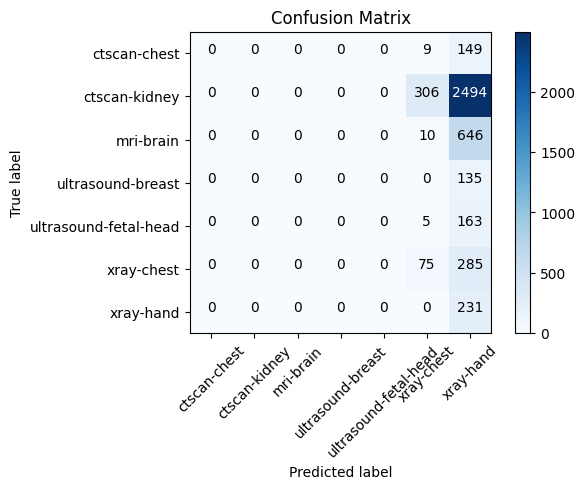

In [ ]:
predictions_vgg16 = pretrained_vgg16_model.predict(test_batches_vgg16)
rounded_predictions_vgg16 = np.argmax(predictions_vgg16,axis=-1)
cm = confusion_matrix(y_true=test_batches_vgg16.classes,y_pred=rounded_predictions_vgg16)
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_vgg16_organs = []
for i in range(0,4506):
  image_predected_vgg16_organs.append([test_batches_vgg16.filenames[i],predictions_vgg16[i][0].item(),predictions_vgg16[i][1].item(),predictions_vgg16[i][2].item(),predictions_vgg16[i][3].item(),predictions_vgg16[i][4].item(),predictions_vgg16[i][5].item(),predictions_vgg16[i][6].item()])
df_vgg16_organs = pd.DataFrame(image_predected_vgg16_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])

df_vgg16_organs.to_csv("extration_vgg16_7organs_result.csv")

In [ ]:
pretrained_vgg16_model.save("pretrained_vgg16_7organs",save_format='h5')

shutil.copy("/content/pretrained_vgg16_7organs","/content/drive/MyDrive/pretrained_vgg16_7organs")
shutil.copy("/content/extration_vgg16_7organs_result.csv","/content/drive/MyDrive/extration_vgg16_7organs_result.csv")

'/content/drive/MyDrive/extration_vgg16_7organs_result.csv'

## Vgg19

In [ ]:
history_vgg19 = pretrained_vgg19_model.fit(train_batches_vgg19, validation_data=valid_batches_vgg19, epochs=5)

Epoch 1/5
277/277 [==============================] - 604s 2s/step - loss: 1.6488 - accuracy: 0.3121 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.7012 - val_accuracy: 0.3702 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/5
277/277 [==============================] - 569s 2s/step - loss: 1.4270 - accuracy: 0.4906 - f1_m: 0.0054 - precision_m: 0.1415 - recall_m: 0.0028 - val_loss: 1.5221 - val_accuracy: 0.5207 - val_f1_m: 0.0736 - val_precision_m: 0.6852 - val_recall_m: 0.0393
Epoch 3/5
277/277 [==============================] - 569s 2s/step - loss: 1.1916 - accuracy: 0.6670 - f1_m: 0.2370 - precision_m: 0.8642 - recall_m: 0.1445 - val_loss: 1.3409 - val_accuracy: 0.5621 - val_f1_m: 0.3424 - val_precision_m: 0.6601 - val_recall_m: 0.2325
Epoch 4/5
277/277 [==============================] - 566s 2s/step - loss: 1.0115 - accuracy: 0.6776 - f1_m: 0.5089 - precision_m: 0.8123 - recall_m: 0.3752 - val_loss: 1.2101 - v

46/46 [==============================] - 78s 2s/step
[[   0  140   14    0    0    3    1]
 [   0 2709   15    0    0   31   45]
 [   0  534   78    0    0   26   18]
 [   0    0    0    0    0  101   34]
 [   0   53   32    0    0   64   19]
 [   0   10    0    0    0  342    8]
 [   0    0    0    0    0    2  229]]


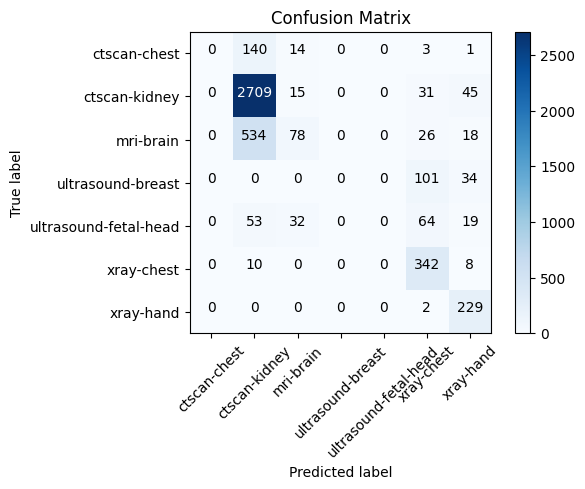

In [ ]:
predictions_vgg19 = pretrained_vgg19_model.predict(test_batches_vgg19)
rounded_predictions_vgg19 = np.argmax(predictions_vgg19,axis=-1)
cm = confusion_matrix(y_true=test_batches_vgg19.classes,y_pred=rounded_predictions_vgg19)
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_vgg19_organs = []
for i in range(0,4506):
  image_predected_vgg19_organs.append([test_batches_vgg19.filenames[i],predictions_vgg19[i][0].item(),predictions_vgg19[i][1].item(),predictions_vgg19[i][2].item(),predictions_vgg19[i][3].item(),predictions_vgg19[i][4].item(),predictions_vgg19[i][5].item(),predictions_vgg19[i][6].item()])
df_vgg19_organs = pd.DataFrame(image_predected_vgg19_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])
df_vgg19_organs.to_csv("extration_vgg19_7organs_result.csv")

In [ ]:

pretrained_vgg19_model.save("pretrained_vgg19_7organs",save_format='h5')

shutil.copy("/content/pretrained_vgg19_7organs","/content/drive/MyDrive/pretrained_vgg19_7organs")
shutil.copy("/content/extration_vgg19_7organs_result.csv","/content/drive/MyDrive/extration_vgg19_7organs_result.csv")

'/content/drive/MyDrive/extration_vgg19_7organs_result.csv'

## Resnet50

In [ ]:
history_resnet50 = pretrained_resnet50_model.fit(train_batches_resnet50,validation_data=valid_batches_resnet50, epochs=5)

Epoch 1/5
277/277 [==============================] - 583s 2s/step - loss: 1.4097 - accuracy: 0.6065 - f1_m: 0.4284 - precision_m: 0.8737 - recall_m: 0.2900 - val_loss: 1.3354 - val_accuracy: 0.7193 - val_f1_m: 0.5932 - val_precision_m: 0.9051 - val_recall_m: 0.4425
Epoch 2/5
277/277 [==============================] - 561s 2s/step - loss: 1.2964 - accuracy: 0.6896 - f1_m: 0.5585 - precision_m: 0.8803 - recall_m: 0.4122 - val_loss: 1.2981 - val_accuracy: 0.7064 - val_f1_m: 0.6912 - val_precision_m: 0.8592 - val_recall_m: 0.5793
Epoch 3/5
277/277 [==============================] - 562s 2s/step - loss: 1.2468 - accuracy: 0.7228 - f1_m: 0.6232 - precision_m: 0.8835 - recall_m: 0.4839 - val_loss: 1.2235 - val_accuracy: 0.7108 - val_f1_m: 0.7249 - val_precision_m: 0.9086 - val_recall_m: 0.6061
Epoch 4/5
277/277 [==============================] - 560s 2s/step - loss: 1.2184 - accuracy: 0.7406 - f1_m: 0.6606 - precision_m: 0.8841 - recall_m: 0.5294 - val_loss: 1.2017 - val_accuracy: 0.7626 - va

46/46 [==============================] - 78s 2s/step
[[   0   56   86    0    0    4   12]
 [   0 2758   22    0    0    3   17]
 [   0   37  585    0    3   19   12]
 [   0    3   43    3    0   74   12]
 [   0    5  136    0    4   12   11]
 [   0    1   30    0    0  303   26]
 [   0    3   31    0    0   17  180]]


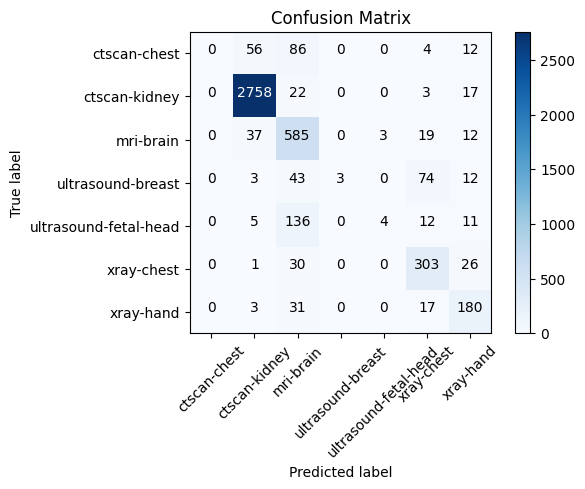

In [ ]:
predictions_resnet50 = pretrained_resnet50_model.predict(test_batches_resnet50)
rounded_predictions_resnet50 = np.argmax(predictions_resnet50,axis=-1)
cm = confusion_matrix(y_true=test_batches_resnet50.classes,y_pred=rounded_predictions_resnet50[0])
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_resnet50_organs = []
for i in range(0,4506):
  image_predected_resnet50_organs.append([test_batches_resnet50.filenames[i],predictions_resnet50[0][i][0].item(),predictions_resnet50[0][i][1].item(),predictions_resnet50[0][i][2].item(),predictions_resnet50[0][i][3].item(),predictions_resnet50[0][i][4].item(),predictions_resnet50[0][i][5].item(),predictions_resnet50[0][i][6].item()])
df_resnet50_organs = pd.DataFrame(image_predected_resnet50_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])
df_resnet50_organs.to_csv("extration_resnet50_7organs_result.csv")

In [ ]:

pretrained_resnet50_model.save("pretrained_resnet50_7organs",save_format='h5')

shutil.copy("/content/pretrained_resnet50_7organs","/content/drive/MyDrive/pretrained_resnet50_7organs")
shutil.copy("/content/extration_resnet50_7organs_result.csv","/content/drive/MyDrive/extration_resnet50_7organs_result.csv")

'/content/drive/MyDrive/extration_resnet50_7organs_result.csv'

## Inception

In [ ]:
history_inceptionv3 = pretrained_inceptionv3_model.fit(train_batches_inception_v3, validation_data=valid_batches_inception_v3, epochs=5)

Epoch 1/5
277/277 [==============================] - 567s 2s/step - loss: 0.8995 - accuracy: 0.9688 - f1_m: 0.9525 - precision_m: 0.9863 - recall_m: 0.9232 - val_loss: 0.8162 - val_accuracy: 0.9922 - val_f1_m: 0.9853 - val_precision_m: 0.9982 - val_recall_m: 0.9729
Epoch 2/5
277/277 [==============================] - 554s 2s/step - loss: 0.8134 - accuracy: 0.9948 - f1_m: 0.9873 - precision_m: 0.9987 - recall_m: 0.9762 - val_loss: 0.8008 - val_accuracy: 0.9959 - val_f1_m: 0.9921 - val_precision_m: 0.9982 - val_recall_m: 0.9861
Epoch 3/5
277/277 [==============================] - 556s 2s/step - loss: 0.8028 - accuracy: 0.9964 - f1_m: 0.9909 - precision_m: 0.9991 - recall_m: 0.9829 - val_loss: 0.7959 - val_accuracy: 0.9967 - val_f1_m: 0.9935 - val_precision_m: 0.9989 - val_recall_m: 0.9882
Epoch 4/5
277/277 [==============================] - 570s 2s/step - loss: 0.7988 - accuracy: 0.9969 - f1_m: 0.9925 - precision_m: 0.9993 - recall_m: 0.9859 - val_loss: 0.7970 - val_accuracy: 0.9963 - va

46/46 [==============================] - 81s 2s/step
[[ 155    1    2    0    0    0    0]
 [   0 2798    2    0    0    0    0]
 [   0    0  656    0    0    0    0]
 [   0    0    0  134    1    0    0]
 [   0    0    1    0  167    0    0]
 [   0    0    0    0    0  360    0]
 [   0    0    0    0    0    0  231]]


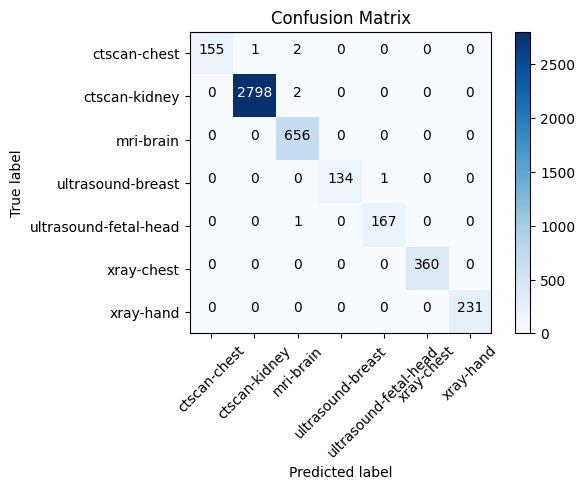

In [ ]:
predictions_inceptionv3 = pretrained_inceptionv3_model.predict(test_batches_inception_v3)
rounded_predictions_inceptionv3 = np.argmax(predictions_inceptionv3,axis=-1)
cm = confusion_matrix(y_true=test_batches_inception_v3.classes,y_pred=rounded_predictions_inceptionv3[0])
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_inception_v3_organs = []
for i in range(0,4506):
  image_predected_inception_v3_organs.append([test_batches_inception_v3.filenames[i],predictions_inceptionv3[0][i][0].item(),predictions_inceptionv3[0][i][1].item(),predictions_inceptionv3[0][i][2].item(),predictions_inceptionv3[0][i][3].item(),predictions_inceptionv3[0][i][4].item(),predictions_inceptionv3[0][i][5].item(),predictions_inceptionv3[0][i][6].item()])
df_inception_v3_organs = pd.DataFrame(image_predected_inception_v3_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])
df_inception_v3_organs.to_csv("extration_inception_v3_7organs_result.csv")

In [ ]:

pretrained_inceptionv3_model.save("pretrained_inception_v3_7organs",save_format='h5')

shutil.copy("/content/pretrained_inception_v3_7organs","/content/drive/MyDrive/pretrained_inception_v3_7organs")
shutil.copy("/content/extration_inception_v3_7organs_result.csv","/content/drive/MyDrive/extration_inception_v3_7organs_result.csv")

'/content/drive/MyDrive/extration_inception_v3_7organs_result.csv'

## Xception

In [ ]:
history_xception = pretrained_xception_model.fit(train_batches_xception, validation_data=valid_batches_xception, epochs=5)

Epoch 1/5
277/277 [==============================] - 593s 2s/step - loss: 0.8470 - accuracy: 0.9806 - f1_m: 0.9671 - precision_m: 0.9907 - recall_m: 0.9471 - val_loss: 0.8048 - val_accuracy: 0.9945 - val_f1_m: 0.9906 - val_precision_m: 0.9996 - val_recall_m: 0.9818
Epoch 2/5
277/277 [==============================] - 576s 2s/step - loss: 0.8017 - accuracy: 0.9968 - f1_m: 0.9912 - precision_m: 0.9991 - recall_m: 0.9836 - val_loss: 0.7914 - val_accuracy: 0.9982 - val_f1_m: 0.9948 - val_precision_m: 0.9996 - val_recall_m: 0.9900
Epoch 3/5
277/277 [==============================] - 581s 2s/step - loss: 0.7948 - accuracy: 0.9978 - f1_m: 0.9941 - precision_m: 0.9995 - recall_m: 0.9888 - val_loss: 0.7896 - val_accuracy: 0.9985 - val_f1_m: 0.9948 - val_precision_m: 0.9996 - val_recall_m: 0.9900
Epoch 4/5
277/277 [==============================] - 573s 2s/step - loss: 0.7908 - accuracy: 0.9980 - f1_m: 0.9951 - precision_m: 0.9996 - recall_m: 0.9908 - val_loss: 0.7861 - val_accuracy: 0.9985 - va

46/46 [==============================] - 81s 2s/step
[[ 156    2    0    0    0    0    0]
 [   0 2798    2    0    0    0    0]
 [   0    0  656    0    0    0    0]
 [   0    0    0  133    2    0    0]
 [   0    0    1    0  167    0    0]
 [   0    0    0    0    0  360    0]
 [   0    0    0    0    0    0  231]]


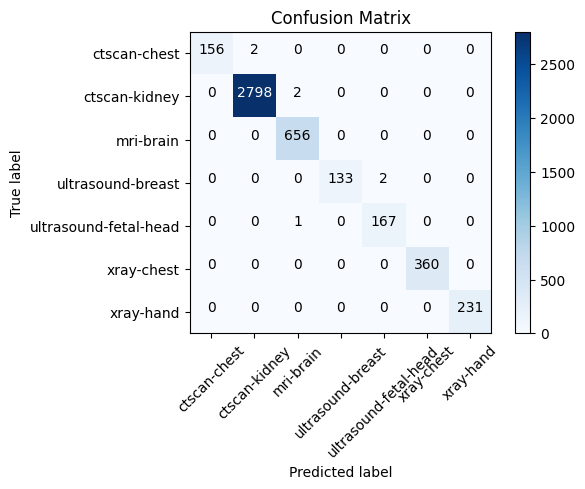

In [ ]:
predictions_xception = pretrained_xception_model.predict(test_batches_xception)
rounded_predictions_xception = np.argmax(predictions_xception,axis=-1)
cm = confusion_matrix(y_true=test_batches_xception.classes,y_pred=rounded_predictions_xception[0])
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_xception_organs = []
for i in range(0,4506):
  image_predected_xception_organs.append([test_batches_xception.filenames[i],predictions_xception[0][i][0].item(),predictions_xception[0][i][1].item(),predictions_xception[0][i][2].item(),predictions_xception[0][i][3].item(),predictions_xception[0][i][4].item(),predictions_xception[0][i][5].item(),predictions_xception[0][i][6].item()])
df_xception_organs = pd.DataFrame(image_predected_xception_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])
df_xception_organs.to_csv("extration_xception_7organs_result.csv")

In [ ]:

pretrained_xception_model.save("pretrained_xception_7organs",save_format='h5')

shutil.copy("/content/pretrained_xception_7organs","/content/drive/MyDrive/pretrained_xception_7organs")
shutil.copy("/content/extration_xception_7organs_result.csv","/content/drive/MyDrive/extration_xception_8organs_result.csv")

'/content/drive/MyDrive/extration_xception_8organs_result.csv'

## Nasnet

In [ ]:
history_nasnet = pretrained_nasnet_model.fit(train_batches_nasnet, validation_data=valid_batches_nasnet, epochs=5)

Epoch 1/5
277/277 [==============================] - 646s 2s/step - loss: 0.8576 - accuracy: 0.9802 - f1_m: 0.9647 - precision_m: 0.9892 - recall_m: 0.9427 - val_loss: 0.8045 - val_accuracy: 0.9945 - val_f1_m: 0.9882 - val_precision_m: 0.9982 - val_recall_m: 0.9786
Epoch 2/5
277/277 [==============================] - 625s 2s/step - loss: 0.8008 - accuracy: 0.9961 - f1_m: 0.9910 - precision_m: 0.9991 - recall_m: 0.9832 - val_loss: 0.7944 - val_accuracy: 0.9959 - val_f1_m: 0.9930 - val_precision_m: 0.9993 - val_recall_m: 0.9868
Epoch 3/5
277/277 [==============================] - 612s 2s/step - loss: 0.7948 - accuracy: 0.9968 - f1_m: 0.9936 - precision_m: 0.9990 - recall_m: 0.9884 - val_loss: 0.7893 - val_accuracy: 0.9974 - val_f1_m: 0.9950 - val_precision_m: 0.9986 - val_recall_m: 0.9914
Epoch 4/5
277/277 [==============================] - 617s 2s/step - loss: 0.7921 - accuracy: 0.9976 - f1_m: 0.9944 - precision_m: 0.9993 - recall_m: 0.9895 - val_loss: 0.7867 - val_accuracy: 0.9985 - va

46/46 [==============================] - 92s 2s/step
[[ 156    0    2    0    0    0    0]
 [   0 2797    3    0    0    0    0]
 [   0    4  652    0    0    0    0]
 [   0    0    0  132    1    1    1]
 [   0    0    0    0  168    0    0]
 [   0    0    0    0    0  360    0]
 [   0    0    0    0    0    0  231]]


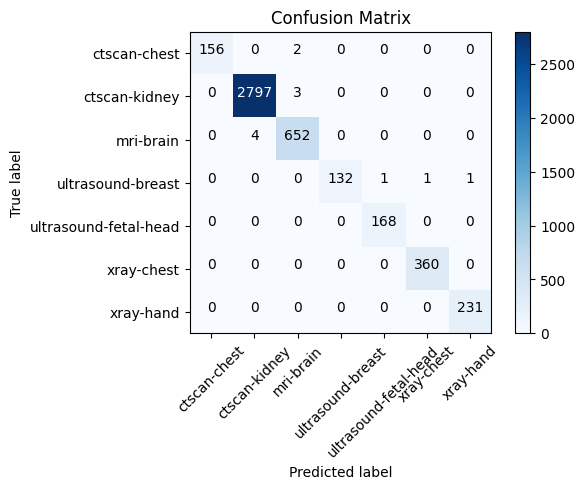

In [ ]:
predictions_nasnet = pretrained_nasnet_model.predict(test_batches_nasnet)
rounded_predictions_nasnet = np.argmax(predictions_nasnet,axis=-1)
cm = confusion_matrix(y_true=test_batches_nasnet.classes,y_pred=rounded_predictions_nasnet[0])
plot_confusion_matrix(cm=cm, classes=["ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"],title="Confusion Matrix")

In [ ]:
image_predected_nasnet_organs = []
for i in range(0,4506):
  image_predected_nasnet_organs.append([test_batches_nasnet.filenames[i],predictions_nasnet[0][i][0].item(),predictions_nasnet[0][i][1].item(),predictions_nasnet[0][i][2].item(),predictions_nasnet[0][i][3].item(),predictions_nasnet[0][i][4].item(),predictions_nasnet[0][i][5].item(),predictions_nasnet[0][i][6].item()])
df_nasnet_organs = pd.DataFrame(image_predected_nasnet_organs,columns=["Image Name","ctscan-chest","ctscan-kidney","mri-brain","ultrasound-breast","ultrasound-fetal-head","xray-chest","xray-hand"])
df_nasnet_organs.to_csv("extration_nasnet_7organs_result.csv")

In [ ]:

pretrained_nasnet_model.save("pretrained_nasnet_7organs",save_format='h5')

shutil.copy("/content/pretrained_nasnet_7organs","/content/drive/MyDrive/pretrained_nasnet_7organs")
shutil.copy("/content/extration_nasnet_7organs_result.csv","/content/drive/MyDrive/extration_nasnet_7organs_result.csv")

'/content/drive/MyDrive/extration_nasnet_7organs_result.csv'